In [84]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

from scipy.sparse import csr_matrix
from scipy import sparse

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
import xgboost as xgb


In [85]:
train = pd.read_csv("Final_Train_Dataset.csv",index_col=0)
train.head()

,experience,job_description,job_desig,job_type,key_skills,location,salary,company_name_encoded
0,5-7 yrs,Exp: Minimum 5 years;Good understanding of IOC...,Senior Exploit and Vulnerability Researcher,NaN,"team skills, communication skills, analytical ...",Delhi NCR(Vikas Puri),6to10,3687
1,10-17 yrs,He should have handled a team of atleast 5-6 d...,Head SCM,NaN,"ppc, logistics, inventory management, supply c...",Sonepat,10to15,458
2,5-9 yrs,Must be an effective communicator (written & s...,Deputy Manager - Talent Management & Leadershi...,Analytics,"HR Analytics, Employee Engagement, Training, S...",Delhi NCR,15to25,4195
3,7-10 yrs,7 - 10 years of overall experience in data e...,Associate Manager Data Engineering,Analytics,"SQL, Javascript, Automation, Python, Ruby, Ana...",Bengaluru,10to15,313
4,1-3 yrs,Chartered Accountancy degree or MBA in Finance...,TS- GSA- Senior Analyst,NaN,"accounting, finance, cash flow, financial plan...",Gurgaon,3to6,1305


In [86]:
train.shape

(19802, 8)

In [87]:
train.isna().sum()

experience                  0
job_description          4418
job_desig                   0
job_type                15005
key_skills                  1
location                    0
salary                      0
company_name_encoded        0
dtype: int64

In [88]:
# separate categoriacl and numerical columns
categorical_col = []
numerical_col = []


for col in train.columns:
    if train[col].dtype == 'object':
        categorical_col.append(col)
    else:
        numerical_col.append(col)

In [89]:
print("Categorial columns:",categorical_col)
print("*"*100)
print("Numerical columns:",numerical_col)


Categorial columns: ['experience', 'job_description', 'job_desig', 'job_type', 'key_skills', 'location', 'salary']
****************************************************************************************************
Numerical columns: ['company_name_encoded']


In [90]:
# check the number cooomon attributes of each ategorical data
for cate in categorical_col:
#     print("Categorical feature's number of class",cate)
    print(train[cate].value_counts())
    print("*"*80)

5-10 yrs     1274
2-5 yrs      1188
3-8 yrs       922
2-7 yrs       832
4-9 yrs       678
3-5 yrs       669
3-6 yrs       630
7-12 yrs      622
1-3 yrs       597
5-8 yrs       576
1-5 yrs       556
4-8 yrs       527
2-4 yrs       515
8-13 yrs      500
1-6 yrs       485
10-15 yrs     472
2-6 yrs       465
8-12 yrs      433
0-5 yrs       421
1-4 yrs       405
3-7 yrs       395
0-2 yrs       386
6-10 yrs      366
6-11 yrs      354
4-6 yrs       353
7-10 yrs      314
0-1 yrs       296
4-7 yrs       277
0-3 yrs       269
5-7 yrs       228
             ... 
20-22 yrs       3
10-11 yrs       3
5-5 yrs         3
12-19 yrs       3
1-1 yrs         2
11-17 yrs       2
2-2 yrs         2
19-25 yrs       2
16-26 yrs       2
15-21 yrs       2
13-14 yrs       2
13-16 yrs       2
13-19 yrs       2
20-28 yrs       2
11-21 yrs       2
16-22 yrs       2
4-4 yrs         1
20-25 yrs       1
16-18 yrs       1
12-13 yrs       1
20-26 yrs       1
8-8 yrs         1
19-23 yrs       1
23-30 yrs       1
11-12 yrs 

In [91]:
train.isna().sum()

experience                  0
job_description          4418
job_desig                   0
job_type                15005
key_skills                  1
location                    0
salary                      0
company_name_encoded        0
dtype: int64

In [92]:
# impute the miissing values
train['job_description'].fillna("None",inplace = True)
train['job_type'].fillna("None",inplace = True)
train['key_skills'].fillna("None",inplace = True)

In [93]:
train.isna().sum()

experience              0
job_description         0
job_desig               0
job_type                0
key_skills              0
location                0
salary                  0
company_name_encoded    0
dtype: int64

In [94]:
train.head(2)

,experience,job_description,job_desig,job_type,key_skills,location,salary,company_name_encoded
0,5-7 yrs,Exp: Minimum 5 years;Good understanding of IOC...,Senior Exploit and Vulnerability Researcher,None,"team skills, communication skills, analytical ...",Delhi NCR(Vikas Puri),6to10,3687
1,10-17 yrs,He should have handled a team of atleast 5-6 d...,Head SCM,None,"ppc, logistics, inventory management, supply c...",Sonepat,10to15,458


In [95]:
### some feature engineering

def experience_col(row):
    v = row.split(" ")[0].split("-")
    v1, v2 = int(v[0]),int(v[1])
    
    return v1+v2//2



In [96]:
train['avg_exp'] = train['experience'].apply(experience_col)
train['Number_of_skills'] = train['key_skills'].apply(lambda x: len(x.split(",")))
train['exp_low'] = train['experience'].apply(lambda x: int(x.split("-")[0]))
train['exp_high'] = train['experience'].apply(lambda x: int(x.split("-")[1].split(" ")[0]))

train['jdescLen']=train.job_description.apply(len)
train['jdsgnLen']=train.job_desig.apply(len)
train['locationLen']=train.location.apply(lambda x:len(x.split(",")))
                                              

In [97]:
train.head()

,experience,job_description,job_desig,job_type,key_skills,location,salary,company_name_encoded,avg_exp,Number_of_skills,exp_low,exp_high,jdescLen,jdsgnLen,locationLen
0,5-7 yrs,Exp: Minimum 5 years;Good understanding of IOC...,Senior Exploit and Vulnerability Researcher,None,"team skills, communication skills, analytical ...",Delhi NCR(Vikas Puri),6to10,3687,8,4,5,7,96,43,1
1,10-17 yrs,He should have handled a team of atleast 5-6 d...,Head SCM,None,"ppc, logistics, inventory management, supply c...",Sonepat,10to15,458,18,6,10,17,108,8,1
2,5-9 yrs,Must be an effective communicator (written & s...,Deputy Manager - Talent Management & Leadershi...,Analytics,"HR Analytics, Employee Engagement, Training, S...",Delhi NCR,15to25,4195,9,4,5,9,100,66,1
3,7-10 yrs,7 - 10 years of overall experience in data e...,Associate Manager Data Engineering,Analytics,"SQL, Javascript, Automation, Python, Ruby, Ana...",Bengaluru,10to15,313,12,7,7,10,106,34,1
4,1-3 yrs,Chartered Accountancy degree or MBA in Finance...,TS- GSA- Senior Analyst,None,"accounting, finance, cash flow, financial plan...",Gurgaon,3to6,1305,2,5,1,3,107,23,1


In [98]:
# var = "6to10"
# k = var.split("to")[1]
# k

var = "6-10"
k = var.split(" ")[0].split("-")
k


['6', '10']

In [99]:
def avearge_salary(row):
    v = row.split(" ")[0].split("to")
    v1, v2 = int(v[0]), int(v[1])
    return v1+v2/2


In [100]:
train['low_salary']  = train['salary'].apply(lambda x: x.split("to")[0])
train['high_salary'] = train['salary'].apply(lambda x: x.split("to")[1])
train['avg_salary'] = train['salary'].apply(avearge_salary)

In [101]:
train.head(2)

,experience,job_description,job_desig,job_type,key_skills,location,salary,company_name_encoded,avg_exp,Number_of_skills,exp_low,exp_high,jdescLen,jdsgnLen,locationLen,low_salary,high_salary,avg_salary
0,5-7 yrs,Exp: Minimum 5 years;Good understanding of IOC...,Senior Exploit and Vulnerability Researcher,None,"team skills, communication skills, analytical ...",Delhi NCR(Vikas Puri),6to10,3687,8,4,5,7,96,43,1,6,10,11.0
1,10-17 yrs,He should have handled a team of atleast 5-6 d...,Head SCM,None,"ppc, logistics, inventory management, supply c...",Sonepat,10to15,458,18,6,10,17,108,8,1,10,15,17.5


### World Clod for several features

In [102]:
from wordcloud import WordCloud #import wordcloud

def visulaize_wrodcloud(text):
    plt.figure(figsize=(15,10)) #figure size
    wordcloud = WordCloud(background_color="black",mode = "RGB", width = 1000, height=500).generate(text)
    plt.imshow(wordcloud,interpolation="bilinear") # show image

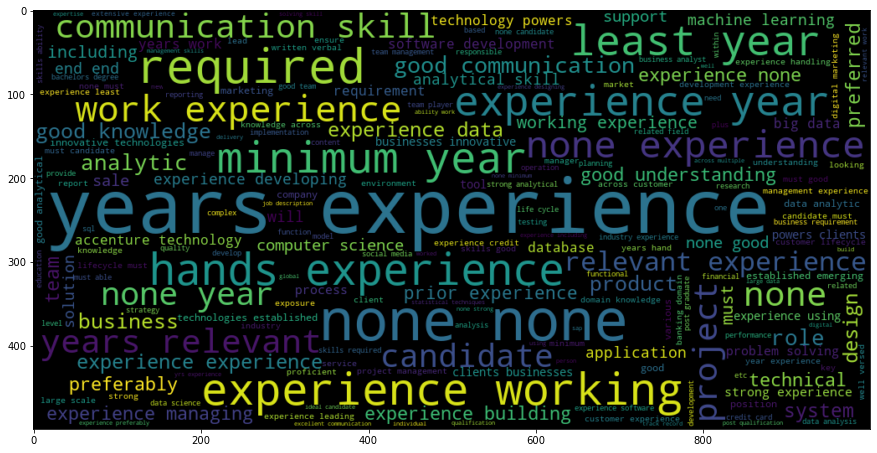

In [103]:
# world clud for job_description feature

text=(" ").join(train['job_description'].str.lower())
visulaize_wrodcloud(text)

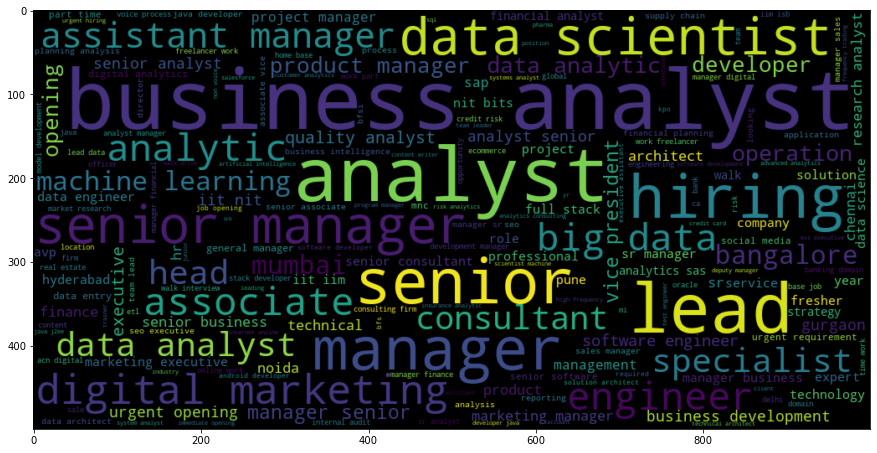

In [104]:
# world clud for job_design feature

text=(" ").join(train['job_desig'].str.lower())
visulaize_wrodcloud(text)

In [105]:
train.columns

Index(['experience', 'job_description', 'job_desig', 'job_type', 'key_skills',
       'location', 'salary', 'company_name_encoded', 'avg_exp',
       'Number_of_skills', 'exp_low', 'exp_high', 'jdescLen', 'jdsgnLen',
       'locationLen', 'low_salary', 'high_salary', 'avg_salary'],
      dtype='object')

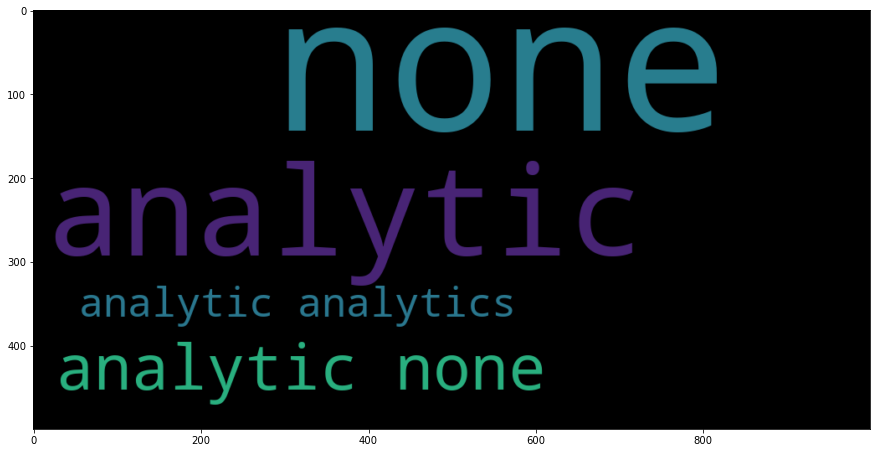

In [82]:
# world clud for job_type feature

text=(" ").join(train['job_type'].str.lower())
visulaize_wrodcloud(text)

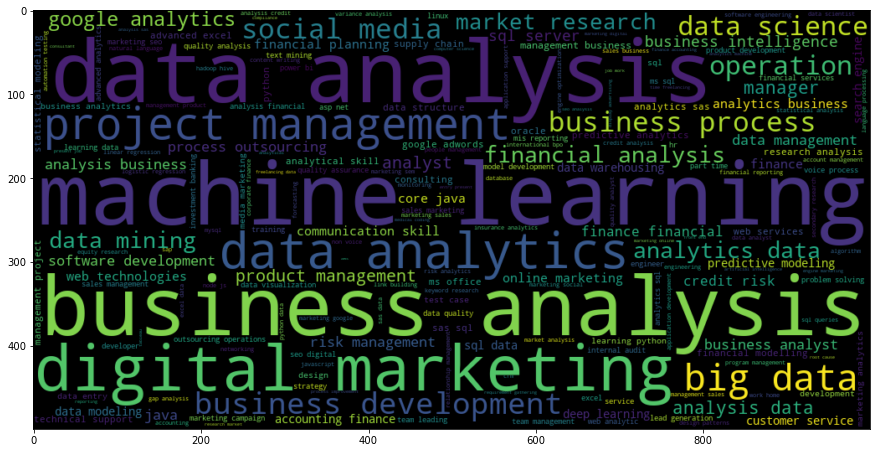

In [83]:
# world clud for key_skills feature

text=(" ").join(train['key_skills'].str.lower())
visulaize_wrodcloud(text)

In [107]:
train['full_textual'] = train[['job_description', 'job_desig', 'job_type', 'key_skills']].astype(str).apply(" ".join,axis=1)

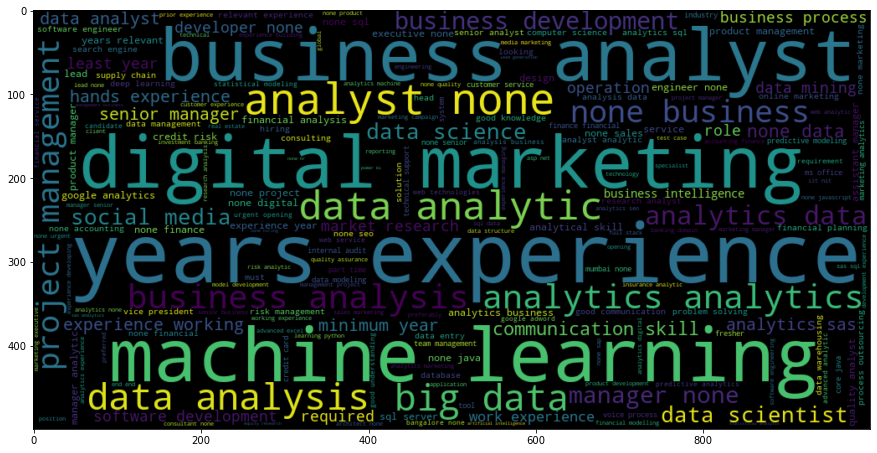

In [109]:
# world cloud for mixing of 'job_description', 'job_desig', 'job_type', 'key_skills' features

text=(" ").join(train['full_textual'].str.lower())
visulaize_wrodcloud(text)

### EDA

In [132]:
train.head(2)

,experience,job_description,job_desig,job_type,key_skills,location,salary,company_name_encoded,avg_exp,Number_of_skills,exp_low,exp_high,jdescLen,jdsgnLen,locationLen,low_salary,high_salary,avg_salary,full_textual
0,5-7 yrs,Exp: Minimum 5 years;Good understanding of IOC...,Senior Exploit and Vulnerability Researcher,None,"team skills, communication skills, analytical ...",Delhi NCR(Vikas Puri),6to10,3687,8,4,5,7,96,43,1,6,10,11.0,Exp: Minimum 5 years;Good understanding of IOC...
1,10-17 yrs,He should have handled a team of atleast 5-6 d...,Head SCM,None,"ppc, logistics, inventory management, supply c...",Sonepat,10to15,458,18,6,10,17,108,8,1,10,15,17.5,He should have handled a team of atleast 5-6 d...


In [135]:
train.iloc[:,7:].head(2)

,company_name_encoded,avg_exp,Number_of_skills,exp_low,exp_high,jdescLen,jdsgnLen,locationLen,low_salary,high_salary,avg_salary,full_textual
0,3687,8,4,5,7,96,43,1,6,10,11.0,Exp: Minimum 5 years;Good understanding of IOC...
1,458,18,6,10,17,108,8,1,10,15,17.5,He should have handled a team of atleast 5-6 d...


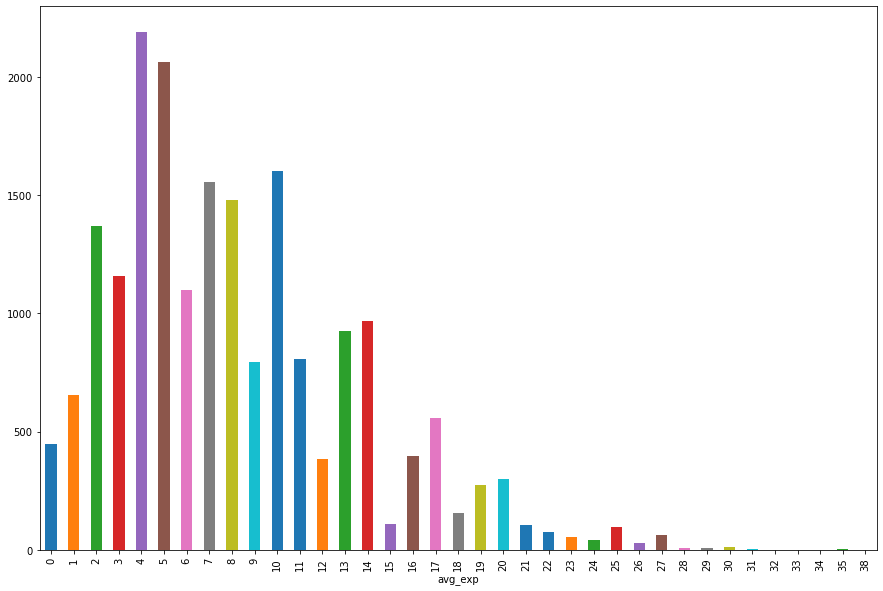

In [133]:
df_avg_exp = train.groupby('avg_exp')['avg_exp'].count()
df_avg_exp.plot(kind='bar',figsize=(15,10))

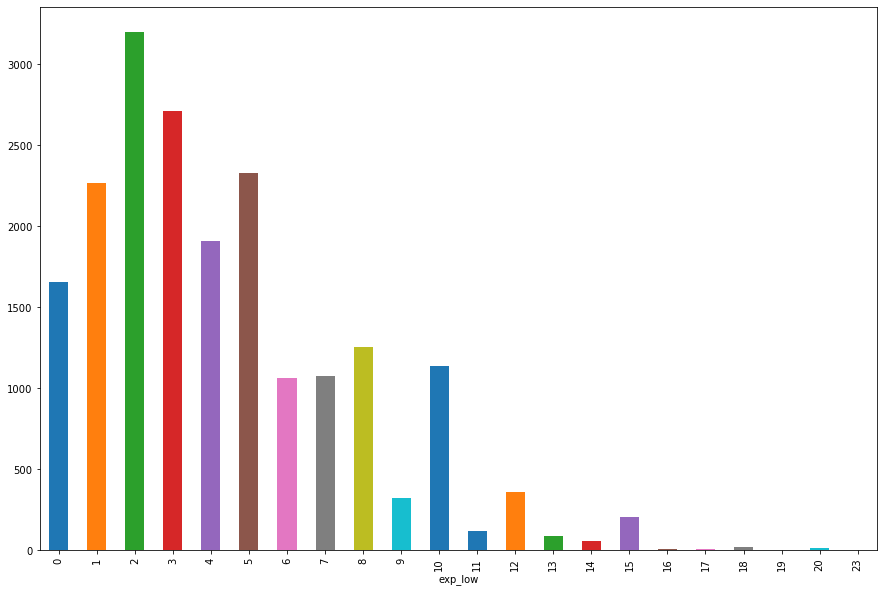

In [136]:
# minimum requirement experience
df_low_exp = train.groupby('exp_low')['exp_low'].count()
df_low_exp.plot(kind='bar',figsize=(15,10))

companies prefer for minimum 2-3 years for data scientist post

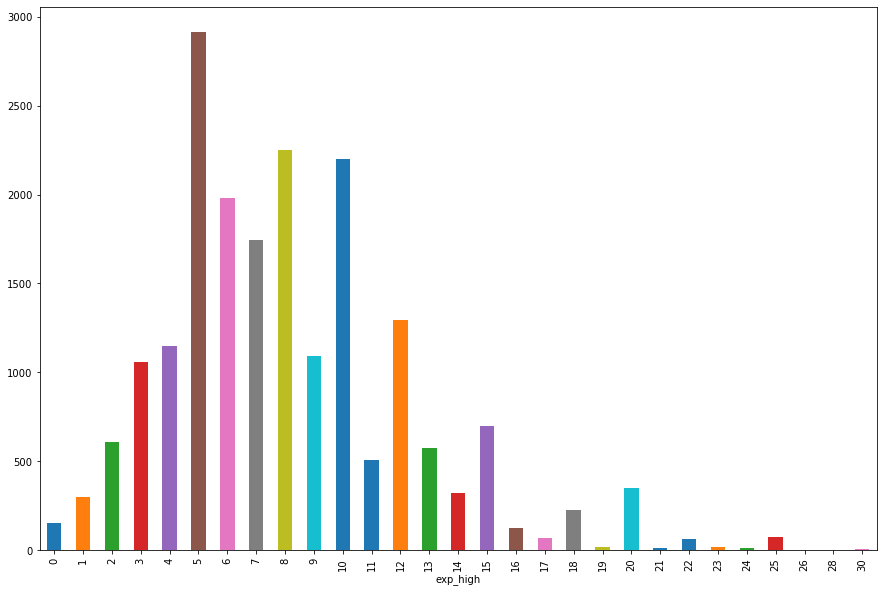

In [137]:
# maximum requirement experience
df_high_exp = train.groupby('exp_high')['exp_high'].count()
df_high_exp.plot(kind='bar',figsize=(15,10))

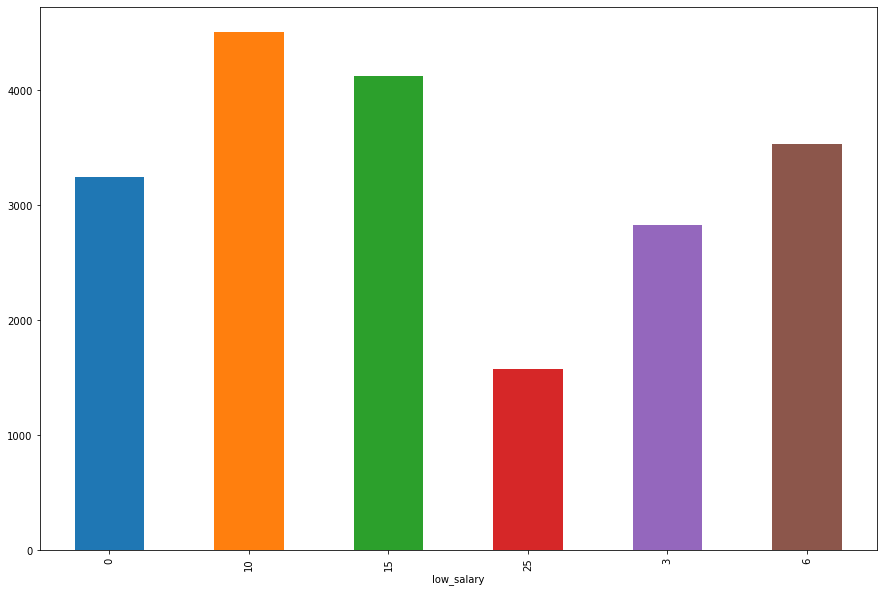

In [138]:
df_low_salary = train.groupby('low_salary')['low_salary'].count()
df_low_salary.plot(kind='bar',figsize=(15,10))


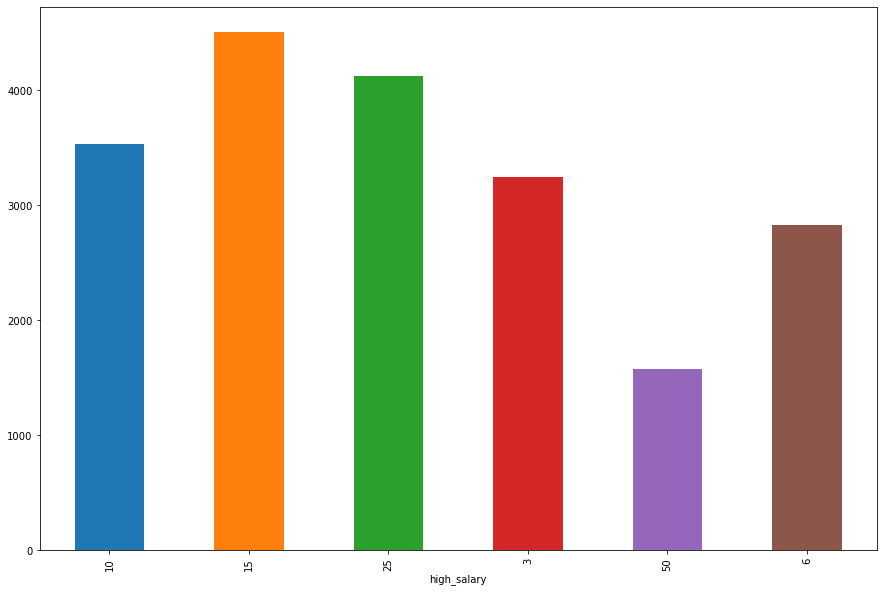

In [139]:
df_high_salary = train.groupby('high_salary')['high_salary'].count()
df_high_salary.plot(kind='bar',figsize=(15,10))


In [140]:
train.iloc[:,7:].head(2)

,company_name_encoded,avg_exp,Number_of_skills,exp_low,exp_high,jdescLen,jdsgnLen,locationLen,low_salary,high_salary,avg_salary,full_textual
0,3687,8,4,5,7,96,43,1,6,10,11.0,Exp: Minimum 5 years;Good understanding of IOC...
1,458,18,6,10,17,108,8,1,10,15,17.5,He should have handled a team of atleast 5-6 d...


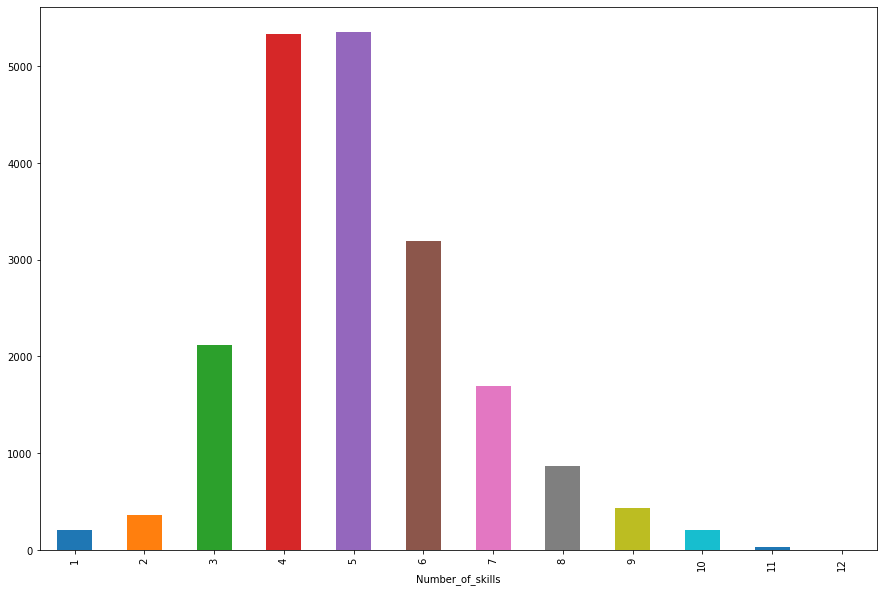

In [141]:
df_nos_of_skills = train.groupby('Number_of_skills')['Number_of_skills'].count()
df_nos_of_skills.plot(kind='bar',figsize=(15,10))


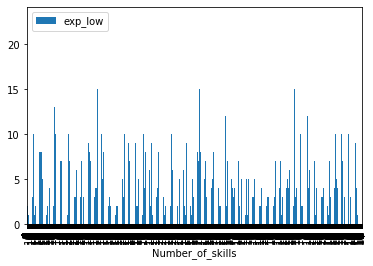

In [145]:
train.plot(x = "Number_of_skills", y=["exp_low"], kind="bar",)


In [146]:
train['Number_of_skills'].value_counts()

5     5347
4     5330
6     3198
3     2123
7     1692
8      869
9      440
2      358
1      209
10     205
11      28
12       3
Name: Number_of_skills, dtype: int64

In [148]:
train['exp_low'].value_counts()

2     3196
3     2713
5     2330
1     2266
4     1911
0     1653
8     1253
10    1139
7     1077
6     1060
12     362
9      323
15     205
11     119
13      90
14      55
18      21
20      13
17       6
16       6
19       3
23       1
Name: exp_low, dtype: int64

In [ ]:
train.drop(['job_type','experience'],axis=1,inplace=True)
target = train.salary


In [53]:
train.isna().sum()

job_description         0
job_desig               0
key_skills              0
location                0
salary                  0
company_name_encoded    0
avg_exp                 0
Number_of_skilss        0
exp_low                 0
exp_high                0
jdescLen                0
jdsgnLen                0
locationLen             0
dtype: int64

In [55]:
tfidf_vect = TfidfVectorizer(ngram_range=(1,3),stop_words="english", analyzer='word')
JobDes = tfidf_vect.fit_transform(train['job_description'])

tfidf_JobDesign = TfidfVectorizer(ngram_range=(1,2),stop_words="english", analyzer='word')
JobDesign = tfidf_JobDesign.fit_transform(train['job_desig'])

tfidf_KeySkills = TfidfVectorizer(ngram_range=(1,3),stop_words="english", analyzer='word')
KeySkills = tfidf_KeySkills.fit_transform(train['key_skills'])

tfidf_vect_jbchar = TfidfVectorizer(ngram_range=(1,9),stop_words="english", analyzer='char')
jbchar =tfidf_vect_jbchar.fit_transform(train['job_description'])

tfidf_jdchar = TfidfVectorizer(ngram_range=(1,8),stop_words="english", analyzer='char')
jdchar =tfidf_jdchar.fit_transform(train['job_desig'])

tfidf_keychar = TfidfVectorizer(ngram_range=(1,9),stop_words="english", analyzer='char')
kschar = tfidf_keychar.fit_transform(train['key_skills'])

In [56]:


le = LabelEncoder()
train['location'] = le.fit_transform(train['location'])
train['company_name_encoded']=le.fit_transform(train['company_name_encoded'])


In [58]:
train.columns

Index(['job_description', 'job_desig', 'key_skills', 'location', 'salary',
       'company_name_encoded', 'avg_exp', 'Number_of_skilss', 'exp_low',
       'exp_high', 'jdescLen', 'jdsgnLen', 'locationLen'],
      dtype='object')

In [59]:

final_features = sparse.hstack((train[['location','company_name_encoded','avg_exp','Number_of_skilss','jdescLen', 'jdsgnLen', 'locationLen']], JobDes, JobDesign, KeySkills,jbchar, jdchar, kschar)).tocsr()

In [60]:
final_features

<19802x2102744 sparse matrix of type '<class 'numpy.float64'>'
	with 26948431 stored elements in Compressed Sparse Row format>

In [63]:
xgb=xgb.XGBClassifier(verbose=True,n_jobs=-1)
xgb.fit(final_features.tocsc(),target)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=-1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1, verbose=True)